In [141]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import glob
import matplotlib.pyplot as plt
cleaned_district = pd.read_csv("cleaned_district.csv")
districts=pd.read_csv("districts_info.csv")

## Data Preprocessing/Exploration

In [ ]:
districts = pd.read_csv('districts_info.csv')
districts.groupby(by='state')['district_id'].count().sort_values()

In [2]:
sample_engagement = pd.read_csv('sample_engagement.csv', index_col=0)
sample_engagement.drop(labels='Unnamed: 0.1', axis=1, inplace=True)
sample_engagement.head()

/Users/haibinglu/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,time,lp_id,pct_access,engagement_index,district_id
5159329,2020-03-12,68779.0,0.00,0.04,6131
5723526,2020-04-06,57371.0,0.01,0.31,8256
21718268,2020-12-20,92918.0,0.03,0.60,9537
18496151,2020-06-17,99916.0,0.00,NaN,9478
12456639,2020-01-13,29322.0,0.80,8.00,2017


In [7]:
# date range
print(sample_engagement['time'].min(), sample_engagement['time'].max())

2020-01-01 2020-12-31


In [8]:
!ls

README.md                   engagement_data
cleaned_district.csv        learnplatform.ipynb
covid-online-learning.ipynb products_info.csv
districts_info.csv          sample_engagement.csv
engagement.csv


In [159]:
sample1 = pd.read_csv('engagement_data/1000.csv')

sample1.set_index('time', inplace=True)

In [160]:
sample1.head() # time series

,lp_id,pct_access,engagement_index
time,,,
2020-01-01,93690.0,0.00,NaN
2020-01-01,17941.0,0.03,0.90
2020-01-01,65358.0,0.03,1.20
2020-01-01,98265.0,0.57,37.79
2020-01-01,59257.0,0.00,NaN


In [135]:
sample1.index

Index(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
       '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
       ...
       '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
       '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31'],
      dtype='object', name='time', length=104003)

In [153]:
engagement = sample1.groupby(by='time')['engagement_index'].sum()

In [ ]:
from datetime import date
engagement['weekday'] = engagement['time'].apply(date.weekday)

In [155]:
engagement.head(20)

time
2020-01-01     3039.34
2020-01-02    30226.31
2020-01-03    37013.32
2020-01-04     1303.03
2020-01-05     2448.28
2020-01-06    31870.86
2020-01-07    39493.64
2020-01-08    38349.32
2020-01-09    41775.94
2020-01-10    36395.92
2020-01-11     1721.59
2020-01-12     2562.61
2020-01-13    39595.45
2020-01-14    34540.16
2020-01-15    43090.66
2020-01-16    42854.30
2020-01-17    44600.03
2020-01-18     1907.34
2020-01-19     2094.50
2020-01-20     4435.20
Name: engagement_index, dtype: float64

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

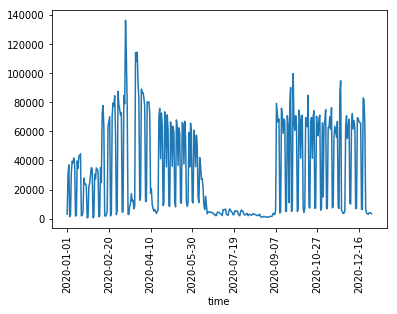

In [154]:
engagement.plot()
plt.xticks(rotation='vertical')

In [114]:
sample.head()

,time,lp_id,pct_access,engagement_index
0,2020-01-01,72932,0.00,NaN
1,2020-01-01,54430,0.06,5.68
2,2020-01-01,50479,0.23,57.35
3,2020-01-01,41424,0.17,60.19
4,2020-01-01,78730,0.00,NaN


   district_id state locale pct_black/hispanic pct_free/reduced  \
3         3188   NaN    NaN                NaN              NaN   

  county_connections_ratio pp_total_raw  
3                      NaN          NaN  


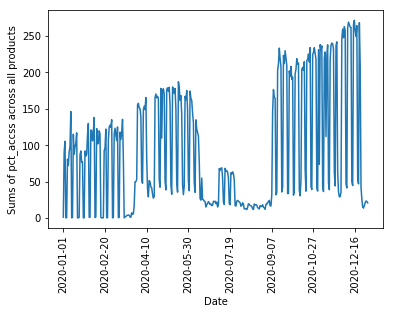

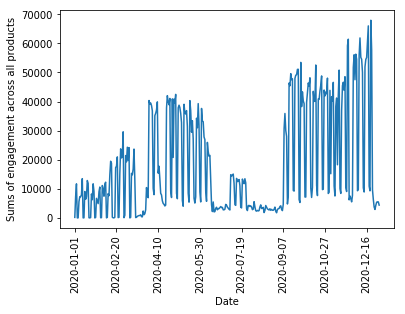

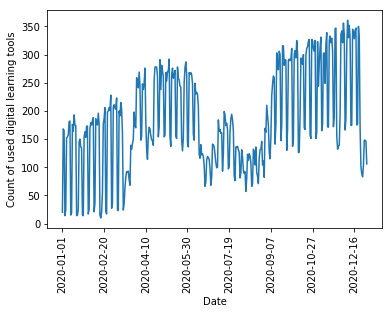

In [124]:
# examine one district
files=glob.glob('engagement_data/*.csv')
file = files[0]
district_id = file[16:-4]
# district information
print(districts[districts['district_id'] == int(district_id)])
# read that district data
sample = pd.read_csv(file)

# totals of access over time
sample.groupby('time')['pct_access'].sum().plot()
plt.xticks(rotation='vertical')
plt.ylabel("Sums of pct_accss across all products")
plt.xlabel("Date")
plt.show()

# totals of engagement across all products over time
sample.groupby('time')['engagement_index'].sum().plot()
plt.xticks(rotation='vertical')
plt.ylabel("Sums of engagement across all products")
plt.xlabel("Date")
plt.show()

# count of used digital learning tools over time
def count_unique(x):
    if x.empty:
        return None 
    else: 
        x = x.dropna()
        return len(x.unique())
sample.groupby('time')['lp_id'].agg(count_unique).plot()
plt.xticks(rotation='vertical')
plt.ylabel("Count of used digital learning tools")
plt.xlabel("Date")
plt.show()



In [ ]:
# findings: 
# (i) access to and count of digital learning tools increase over time
# (ii) significant drop over the summer time

# questions:
# 